In [1]:
from google.colab import files
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statistics as sta
import scipy.stats as stats


# Upload CSV
uploaded = files.upload()


Saving effects-of-covid-19-on-trade-at-15-december-2021-provisional.csv to effects-of-covid-19-on-trade-at-15-december-2021-provisional.csv


In [2]:
df = pd.read_csv("effects-of-covid-19-on-trade-at-15-december-2021-provisional.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111438 entries, 0 to 111437
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Direction       111438 non-null  object
 1   Year            111438 non-null  int64 
 2   Date            111438 non-null  object
 3   Weekday         111438 non-null  object
 4   Country         111438 non-null  object
 5   Commodity       111438 non-null  object
 6   Transport_Mode  111438 non-null  object
 7   Measure         111438 non-null  object
 8   Value           111438 non-null  int64 
 9   Cumulative      111438 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 8.5+ MB


In [91]:
df.head(10)
df[df['Measure'] == 'Tonnes']

,Direction,Year,Date,Weekday,Country,Commodity,Transport_Mode,Measure,Value,Cumulative,year_month
8003,1,2015,2015-01-01,Thursday,All,"Milk powder, butter, and cheese",All,Tonnes,15000,15000,2015-01
8004,1,2015,2015-01-02,Friday,All,"Milk powder, butter, and cheese",All,Tonnes,12000,27000,2015-01
8005,1,2015,2015-01-03,Saturday,All,"Milk powder, butter, and cheese",All,Tonnes,1000,28000,2015-01
8006,1,2015,2015-01-04,Sunday,All,"Milk powder, butter, and cheese",All,Tonnes,6000,34000,2015-01
8007,1,2015,2015-01-05,Monday,All,"Milk powder, butter, and cheese",All,Tonnes,13000,47000,2015-01
...,...,...,...,...,...,...,...,...,...,...,...
106902,1,2021,2021-12-11,Saturday,East Asia (excluding China),"Milk powder, butter, and cheese",All,Tonnes,0,814000,2021-12
106903,1,2021,2021-12-12,Sunday,East Asia (excluding China),"Milk powder, butter, and cheese",All,Tonnes,1000,816000,2021-12
106904,1,2021,2021-12-13,Monday,East Asia (excluding China),"Milk powder, butter, and cheese",All,Tonnes,6000,822000,2021-12
106905,1,2021,2021-12-14,Tuesday,East Asia (excluding China),"Milk powder, butter, and cheese",All,Tonnes,2000,824000,2021-12



### YEAR              = Year of trading did ( 2020, 2021, 2022, ...)
### Date              = Specific date of trading (01-01-2020, 02-01-2020, ...)
### Weekday           = Week day (Monday, Tuesday, Wednesday, ...)
### Country           = Destination Country of trading (China, USA, ...)
### Commondity        = Type of goods have been trade (Fruit, Fish, Wood, ...)
### Transport Mode    = Different kind of Transporting (Sea, Air, ...)
### Measure           = Identify about currency of Trading
### Value             = balance of each Trading did
### Cumulative        = Accumulated balance based on value of tranding and opening balance


In [6]:
nullvalue = df.isna().values.any()
print('Missing Values is', nullvalue)

Missing Values is False


In [7]:
isduplicated = df.duplicated().values.any()
print('Duplicate Values is', isduplicated)

Duplicate Values is False


In [8]:
import numpy as np
import pandas as pd
import statistics as sta

# Group data by Year and sum the Value
#df_groupby_year = df.groupby('Year', as_index=False)['Value'].sum()

# Convert to numpy array for calculations
#values = df_groupby_year['Value'].to_numpy()\
df_by_ton = df[df['Measure'] == 'Tonnes']
values = df_by_ton['Value']

#values = df['Value']

# Calculate statistics
mean = np.mean(values)
median = np.median(values)
mode = sta.mode(values)  # Single mode
_max = np.max(values)
_min = np.min(values)
_range = _max - _min
var = np.var(values, ddof=1)  # Sample variance (unbiased)
std = np.std(values, ddof=1)  # Sample standard deviation
q1 = np.percentile(values, 25)
q3 = np.percentile(values, 75)
iqr = q3 - q1
mad = np.mean(np.abs(values - mean))  # Mean Absolute Deviation

# Print results
print(f"Mean Trade Value: {mean:,.2f} Tonnes")
print(f"Median Trade Value: {median:,.2f} Tonnes")
print(f"Mode Trade Value: {mode:,.2f} Tonnes")
print(f"Max Trade Value: {_max:,.2f} Tonnes")
print(f"Min Trade Value: {_min:,.2f} Tonnes")
print(f"Range of Trade Value: {_range:,.2f} Tonnes")
print(f"Variance: {var:,.2f}")
print(f"Standard Deviation: {std:,.2f} Tonnes")
print(f"Interquartile Range (IQR): {iqr:,.2f} Tonnes")
print(f"Mean Absolute Deviation: {mad:,.2f} Tonnes")

Mean Trade Value: 13,755.32 Tonnes
Median Trade Value: 2,000.00 Tonnes
Mode Trade Value: 1,000.00 Tonnes
Max Trade Value: 250,000.00 Tonnes
Min Trade Value: 0.00 Tonnes
Range of Trade Value: 250,000.00 Tonnes
Variance: 745,644,090.51
Standard Deviation: 27,306.48 Tonnes
Interquartile Range (IQR): 8,000.00 Tonnes
Mean Absolute Deviation: 17,994.57 Tonnes


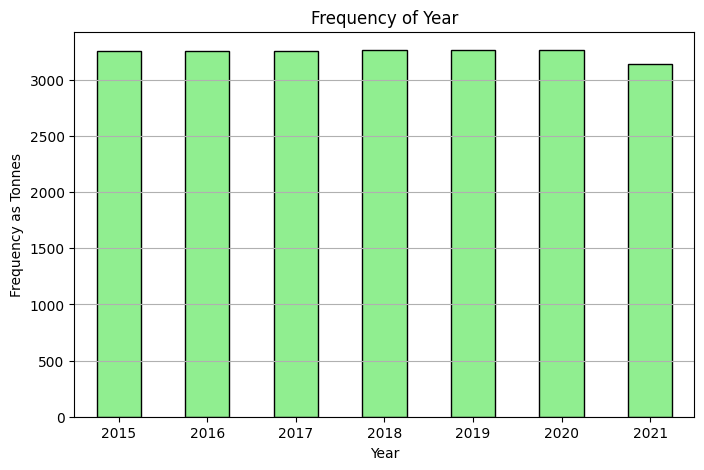

In [10]:
feq_year = df_by_ton['Year'].value_counts().sort_index()

plt.figure(figsize=(8,5))

feq_year.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Frequency of Year')
plt.xlabel('Year')
plt.ylabel('Frequency as Tonnes')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [ ]:
df_by_ton[df_by_ton['Year'] == 2015]

,Direction,Year,Date,Weekday,Country,Commodity,Transport_Mode,Measure,Value,Cumulative
8003,Exports,2015,01/01/2015,Thursday,All,"Milk powder, butter, and cheese",All,Tonnes,15000,15000
8004,Exports,2015,02/01/2015,Friday,All,"Milk powder, butter, and cheese",All,Tonnes,12000,27000
8005,Exports,2015,03/01/2015,Saturday,All,"Milk powder, butter, and cheese",All,Tonnes,1000,28000
8006,Exports,2015,04/01/2015,Sunday,All,"Milk powder, butter, and cheese",All,Tonnes,6000,34000
8007,Exports,2015,05/01/2015,Monday,All,"Milk powder, butter, and cheese",All,Tonnes,13000,47000
...,...,...,...,...,...,...,...,...,...,...
11258,Exports,2015,27/12/2015,Sunday,East Asia (excluding China),"Milk powder, butter, and cheese",All,Tonnes,6000,887000
11259,Exports,2015,28/12/2015,Monday,East Asia (excluding China),"Milk powder, butter, and cheese",All,Tonnes,14000,901000
11260,Exports,2015,29/12/2015,Tuesday,East Asia (excluding China),"Milk powder, butter, and cheese",All,Tonnes,5000,906000
11261,Exports,2015,30/12/2015,Wednesday,East Asia (excluding China),"Milk powder, butter, and cheese",All,Tonnes,0,906000


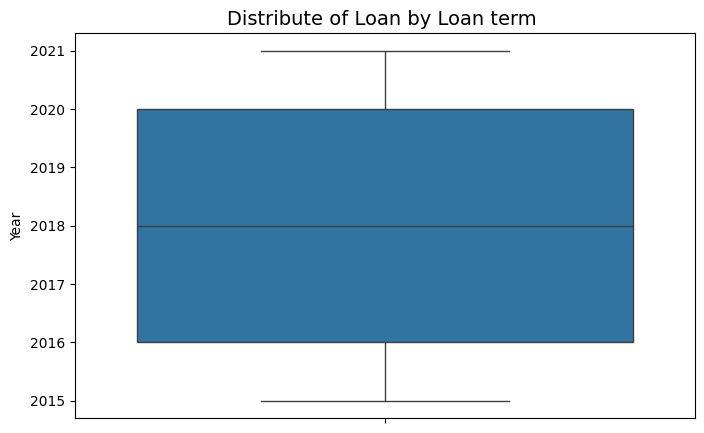

In [11]:
plt.figure(figsize=(8,5))
cust_type = df_by_ton['Year']
sns.boxplot(y=cust_type)
plt.title("Distribute of Loan by Loan term ", fontsize = 14)
plt.show()

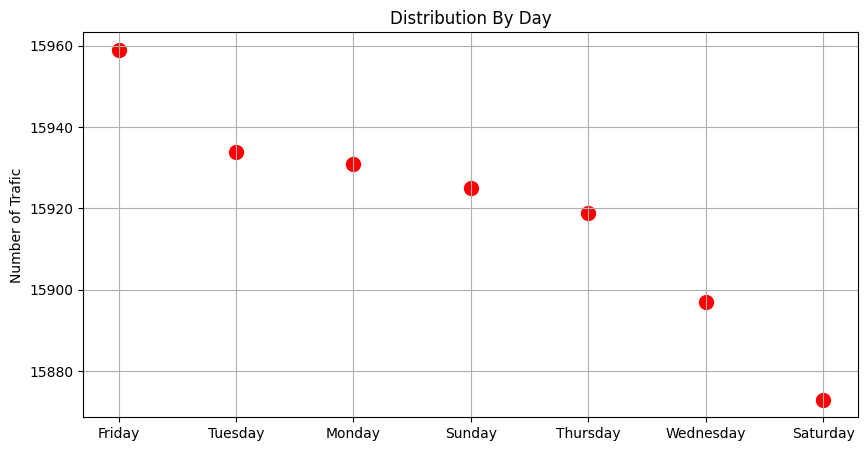

In [12]:
x_day = df['Weekday'].value_counts().keys()
x_value = df['Weekday'].value_counts()

# Create scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(x_day, x_value, color='red', s=100)
#plt.xlabel('Day Range')
plt.ylabel('Number of Trafic')
plt.title('Distribution By Day')
plt.grid(True)
plt.show()

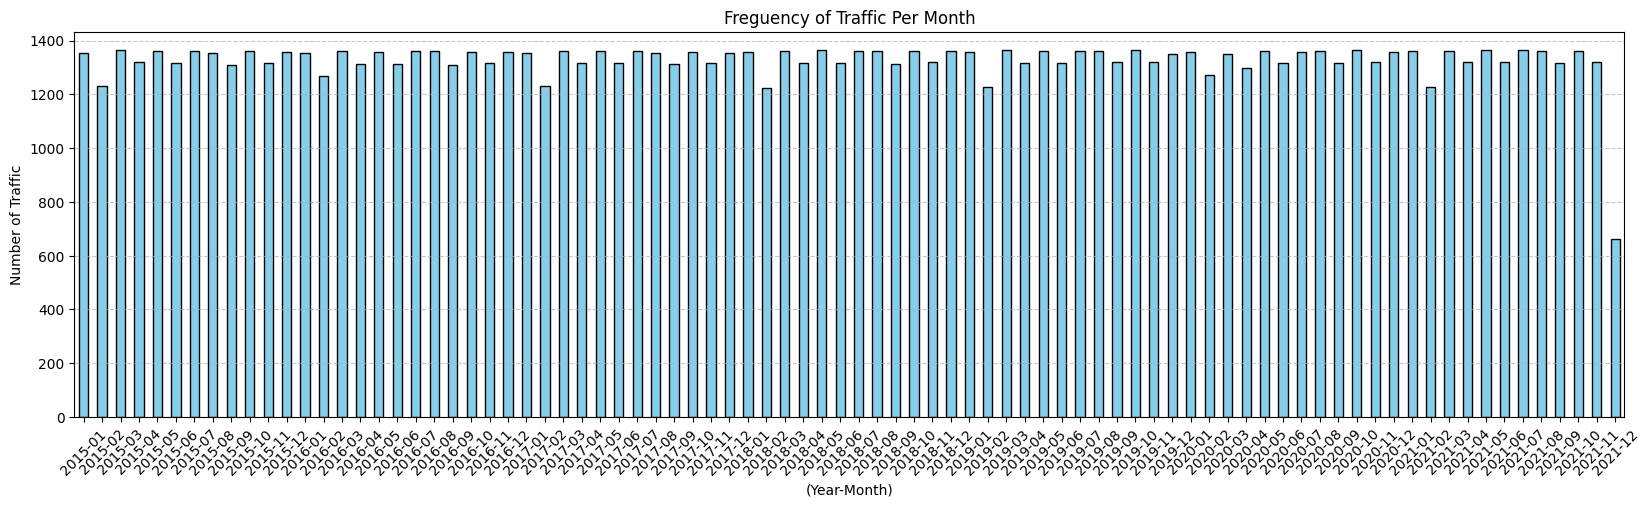

In [13]:
# Extract year-month for grouping
## Convert column Date from Object to Date
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

df['year_month'] = df['Date'].dt.to_period('M')

# Count loans per month
loan_counts = df['year_month'].value_counts().sort_index()

# Plot bar graph
plt.figure(figsize=(20, 5))
loan_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize graph
plt.xlabel("(Year-Month)")
plt.ylabel("Number of Traffic")
plt.title("Freguency of Traffic Per Month")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

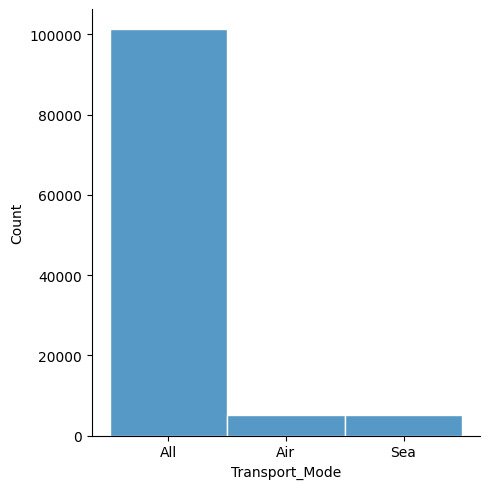

In [14]:
sns.displot(df, x= 'Transport_Mode', binwidth=1, kind='hist', ec='white')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

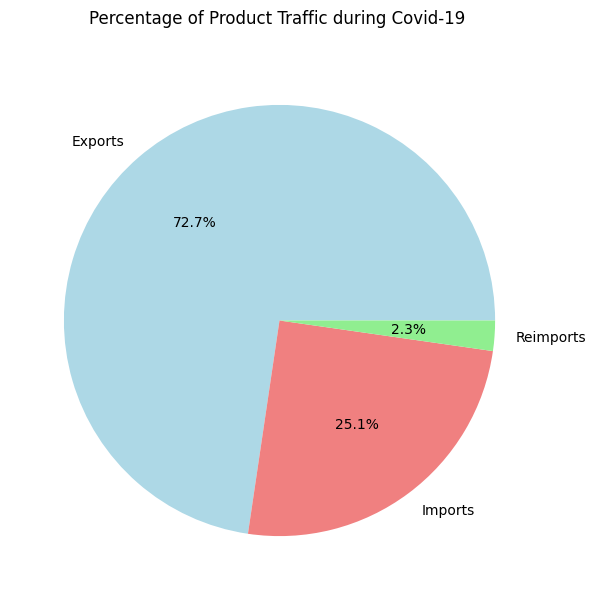

In [16]:
# Count loans per branch
import_direction = df['Direction'].value_counts()

# Create pie chart
plt.figure(figsize=(10, 7))
plt.pie(import_direction, labels=import_direction.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral', 'lightgreen'])

#center_circle = plt.Circle((0, 0), 0.70, fc='white')
#plt.gca().add_artist(center_circle)

# Add title
plt.title('Percentage of Product Traffic during Covid-19 ', pad=20)
# Show plot
plt.show()

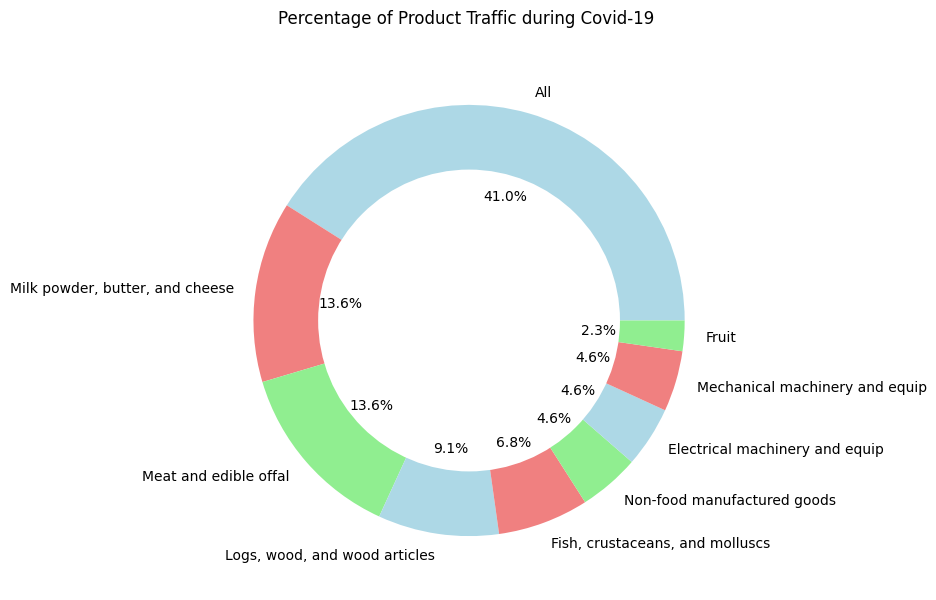

In [17]:
# Count loans per branch
import_direction = df['Commodity'].value_counts()

# Create pie chart
plt.figure(figsize=(10, 7))
plt.pie(import_direction, labels=import_direction.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral', 'lightgreen'])

center_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(center_circle)

# Add title
plt.title('Percentage of Product Traffic during Covid-19 ', pad=20)
# Show plot
plt.show()

In [18]:
sample_random = df_by_ton.sample(n=1000, random_state=42)
df_ramdom_export = sample_random[sample_random['Direction'] == 'Exports']

In [19]:
## Confident Interval

sample_mean = df_ramdom_export['Value'].mean()
sample_std = df_ramdom_export['Value'].std()
confident_level = 0.95
sample_size = df_ramdom_export.shape[0]

standard_error = sample_std/ np.square(sample_size)

z_critical = stats.norm.ppf(1 - (1- confident_level)/ 2)

margin_of_error = z_critical * standard_error
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(f"Mean of Sample {sample_mean:.2f}")
print(f"Standard Deviation of Sample {sample_std:.2f}")
print(f"Confident Level {confident_level:.2f}")
print(f"Sample Size {sample_size}")
print(f"T-Critical Value : {z_critical}")
print(f"Margin of Error {margin_of_error}")
print(f"95% Confident Interval of Mean Balance : (${lower_bound:.2f}, #{upper_bound:.2f})")

Mean of Sample 14212.00
Standard Deviation of Sample 27039.01
Confident Level 0.95
Sample Size 1000
T-Critical Value : 1.959963984540054
Margin of Error 0.05299548948835096
95% Confident Interval of Mean Balance : ($14211.95, #14212.05)


In [ ]:
## Hypothesis Testing
china_bal_mil = df[df['Country'] == 'China']['Value']
usd_bal_mil = df[df['Country'] == 'United States']['Value']

t_statistic, p_value = stats.ttest_ind(china_bal_mil, usd_bal_mil)

alpha = 0.05

print("P-value = ", p_value)


if p_value < alpha:
    print("Reject the null hypothesis")
    print("These is sufficient evidence to confirm that there is different between Exporting to China and United State")
else:
    print("Fail to reject the null hypothesis")
    print("These is no sufficient evidence to confirm that there is different between Exporting to China and United State")

P-value =  5.589477378868638e-53
Reject the null hypothesis
These is sufficient evidence to confirm that there is different between Exporting to China and United State


In [ ]:
## Anova One Way

china_bal_mil = df[df['Country'] =='China']['Value']
usa_bal_mil = df[df['Country'] =='United States']['Value']
aud_bal_mil = df[df['Country'] == 'Australia']['Value']

t_statistic, p_value = stats.f_oneway(china_bal_mil, usa_bal_mil, aud_bal_mil)

alpha = 0.05

print(f"F-statistic:{t_statistic:.2f}")
print("P-value = ", p_value)


if p_value < alpha:
    print("Reject the null hypothesis")
    print("These is sufficient evidence to confirm that there is different between Exporting to China and United State")
else:
    print("Fail to reject the null hypothesis")
    print("These is no sufficient evidence to confirm that there is different between Exporting to China, Australia and United State")

F-statistic:1350.70
P-value =  0.0
Reject the null hypothesis
These is sufficient evidence to confirm that there is different between Exporting to China and United State


                Year     Value  Cumulative
Year        1.000000  0.050919    0.040848
Value       0.050919  1.000000    0.719362
Cumulative  0.040848  0.719362    1.000000


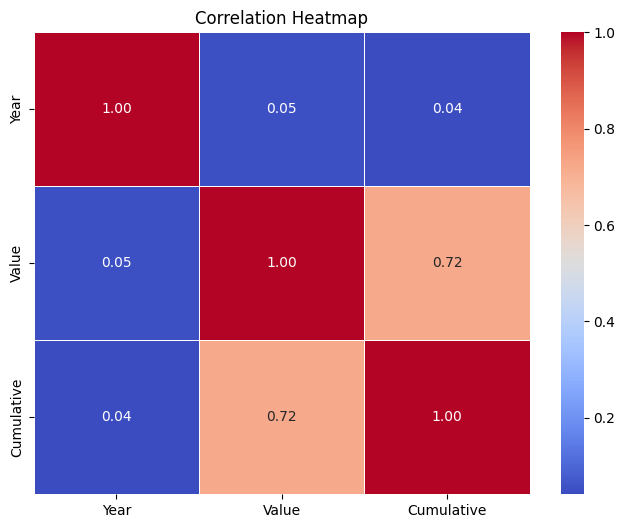

In [ ]:
# Correlation

# Compute correlation matrix
correlation_matrix = df[['Year', 'Value', 'Cumulative']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))

print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Scatter plot: Value vs. Cumulative
#plt.figure(figsize=(8, 5))
#sns.scatterplot(x=df['Value'], y=df['Cumulative'], alpha=0.5)
#plt.xlabel("Trade Value")
#plt.ylabel("Cumulative Trade")
#plt.title("Scatter Plot: Trade Value vs. Cumulative Trade")
#plt.show()

Regression Equation:
Value = 9096360472.90 * Year + 0.00 * Cumulative + -18191996248535.40
Predicted Trade Value for Year 2025 and Cumulative $5B: $182,670,003,012.33
R² Score: 0.938


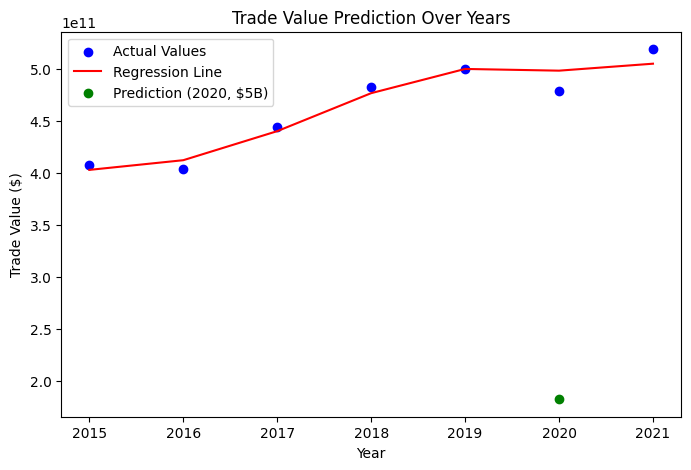

In [ ]:
# Regression

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Group data by Year and sum the Value
yearly_sum = df.groupby('Year', as_index=False).agg({'Cumulative': 'sum', 'Value': 'sum'})

# Define features (X) and target variable (y)
X = yearly_sum[['Year', 'Cumulative']]
y = yearly_sum['Value']

# Train the regression model
model = LinearRegression()
model.fit(X, y)

# Get coefficients
slope_year = model.coef_[0]
slope_cumulative = model.coef_[1]
intercept = model.intercept_

# Print regression equation
print(f"Regression Equation:")
print(f"Value = {slope_year:.2f} * Year + {slope_cumulative:.2f} * Cumulative + {intercept:.2f}")

# Predict for Year 2025 with Cumulative = 5,000,000,000
future_data = np.array([[2020, 5000000000]])
predicted_value = model.predict(future_data)[0]

print(f"Predicted Trade Value for Year 2025 and Cumulative $5B: ${predicted_value:,.2f}")

# Model Performance
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print(f"R² Score: {r2:.3f}")

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 5))
plt.scatter(X['Year'], y, color='blue', label="Actual Values")
plt.plot(X['Year'], y_pred, color='red', label="Regression Line")
plt.scatter(2020, predicted_value, color='green', label="Prediction (2020, $5B)")
plt.xlabel("Year")
plt.ylabel("Trade Value ($)")
plt.title("Trade Value Prediction Over Years")
plt.legend()
plt.show()




In [24]:
# replace value Export = 1, Import =2 and Reimports = 3
df['Direction'] = df['Direction'].replace({"Exports": '1', "Imports" : '2', "Reimports" :'3'})

# convert column Direction from Object to Int
df['Direction'] = df['Direction'].astype(int)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111438 entries, 0 to 111437
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Direction       111438 non-null  int64         
 1   Year            111438 non-null  int64         
 2   Date            111438 non-null  datetime64[ns]
 3   Weekday         111438 non-null  object        
 4   Country         111438 non-null  object        
 5   Commodity       111438 non-null  object        
 6   Transport_Mode  111438 non-null  object        
 7   Measure         111438 non-null  object        
 8   Value           111438 non-null  int64         
 9   Cumulative      111438 non-null  int64         
 10  year_month      111438 non-null  period[M]     
dtypes: datetime64[ns](1), int64(4), object(5), period[M](1)
memory usage: 9.4+ MB


In [46]:
china_export = df[(df['Direction'] == 1) & (df['Country'] == 'China')]
china_import = df[(df['Direction'] == 2) & (df['Country'] == 'China')]

china_exp_value = np.array(china_export['Value'])
china_imp_value = np.array(china_import['Value'])

t_statistic, p_value = stats.ttest_ind(china_exp_value, china_imp_value)
print("p-value", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis")
    print("These is sufficient evidence to confirm that there is different between Exporting to China and Importing from China")
else:
    print("Fail to reject the null hypothesis")

p-value 2.4686703104243244e-211
Reject the null hypothesis
These is sufficient evidence to confirm that there is different between Exporting to China and Importing from China


In [42]:
china_exp_value.sum()

np.int64(165498573000)

In [43]:
china_imp_value.sum()

np.int64(117271000000)

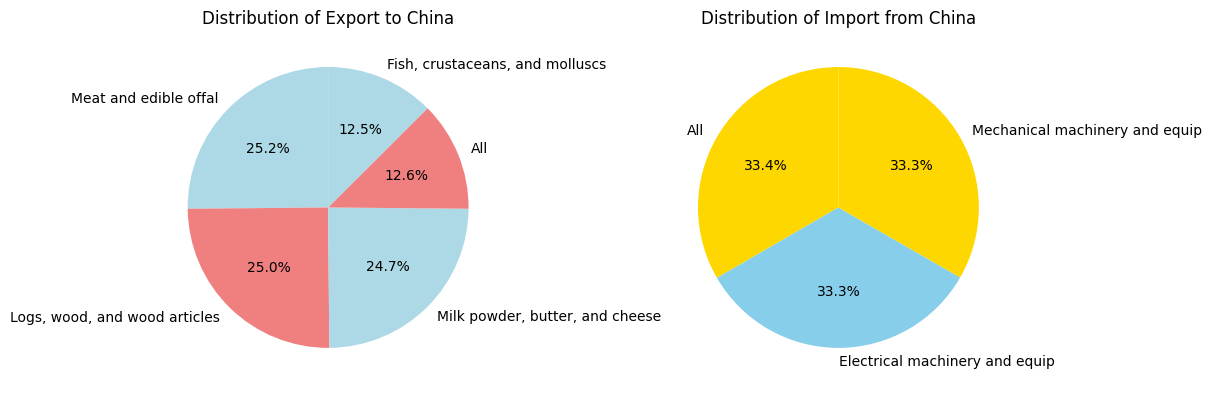

In [53]:

# Plot pie charts side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for Direction distribution
direction_counts = china_export['Commodity'].value_counts()
axes[0].pie(direction_counts, labels=direction_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
axes[0].set_title("Distribution of Export to China")

# Pie chart for Country distribution in filtered data
country_counts = china_import['Commodity'].value_counts()
axes[1].pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=90, colors=['gold', 'skyblue'])
axes[1].set_title("Distribution of Import from China")

plt.tight_layout()
plt.show()


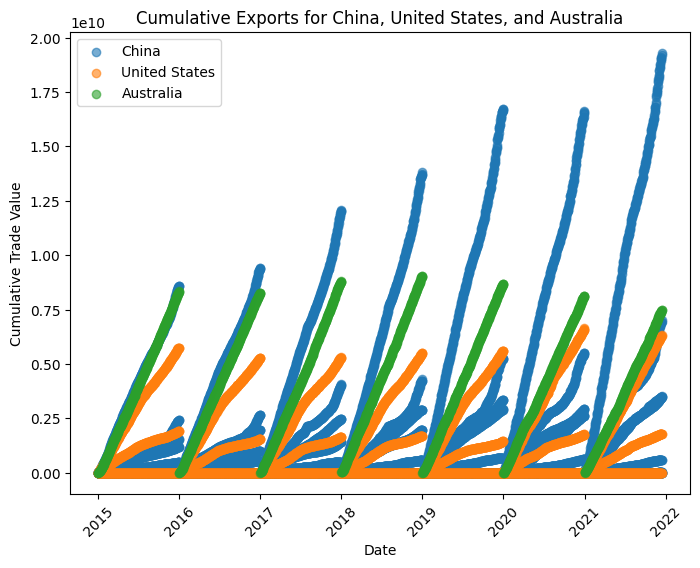

In [55]:
# Scatter plot for Cumulative values of China, United States, and Australia
countries = ["China", "United States", "Australia"]
country_df = df[(df['Direction'] == 1) & (df['Country'].isin(countries))]

plt.figure(figsize=(8, 6))
for country in countries:
    subset = country_df[country_df['Country'] == country]
    plt.scatter(subset['Date'], subset['Cumulative'], label=country, alpha=0.6)

plt.xlabel("Date")
plt.ylabel("Cumulative Trade Value")
plt.title("Cumulative Exports for China, United States, and Australia")
plt.legend()
plt.xticks(rotation=45)
plt.show()

Coefficient of Correlation between Value and Cumulative: 0.66 Tonnes


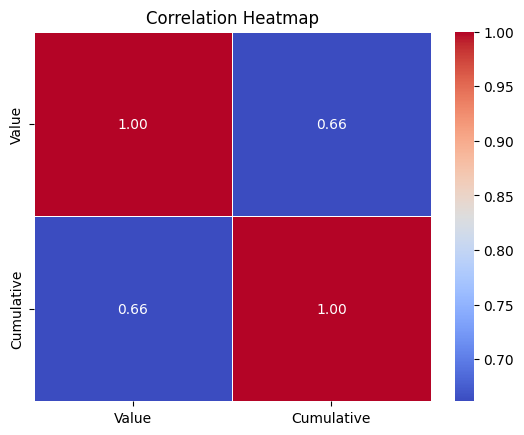

In [62]:
correlation_df = df_by_ton[['Value', 'Cumulative']]

correlation_matrix = correlation_df.corr()

correlation_coefficient = correlation_matrix.iloc[0, 1]

print(f"Coefficient of Correlation between Value and Cumulative: {correlation_coefficient:.2f} Tonnes")
#

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [63]:
df_by_ton

,Direction,Year,Date,Weekday,Country,Commodity,Transport_Mode,Measure,Value,Cumulative
8003,Exports,2015,2015-01-01,Thursday,All,"Milk powder, butter, and cheese",All,Tonnes,15000,15000
8004,Exports,2015,2015-01-02,Friday,All,"Milk powder, butter, and cheese",All,Tonnes,12000,27000
8005,Exports,2015,2015-01-03,Saturday,All,"Milk powder, butter, and cheese",All,Tonnes,1000,28000
8006,Exports,2015,2015-01-04,Sunday,All,"Milk powder, butter, and cheese",All,Tonnes,6000,34000
8007,Exports,2015,2015-01-05,Monday,All,"Milk powder, butter, and cheese",All,Tonnes,13000,47000
...,...,...,...,...,...,...,...,...,...,...
106902,Exports,2021,2021-12-11,Saturday,East Asia (excluding China),"Milk powder, butter, and cheese",All,Tonnes,0,814000
106903,Exports,2021,2021-12-12,Sunday,East Asia (excluding China),"Milk powder, butter, and cheese",All,Tonnes,1000,816000
106904,Exports,2021,2021-12-13,Monday,East Asia (excluding China),"Milk powder, butter, and cheese",All,Tonnes,6000,822000
106905,Exports,2021,2021-12-14,Tuesday,East Asia (excluding China),"Milk powder, butter, and cheese",All,Tonnes,2000,824000


Regression Equation:
Cumulative = 0.00 * Direction + 112.83 * Value + 884930.71
Predict Cumulative for 10000 Tonnes and Direction Export is [12168118.01663575] Tonnes
R² Score: 0.438


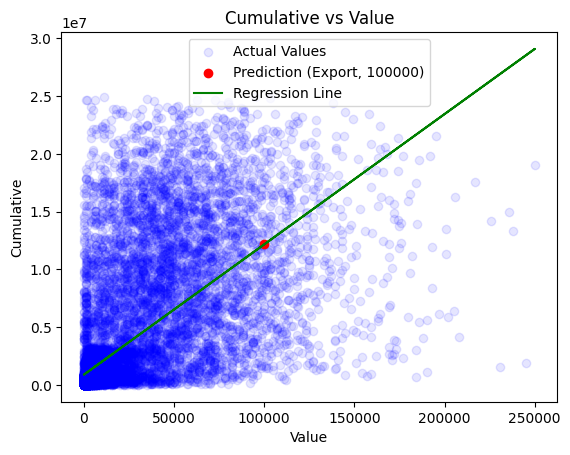

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Define features (X) and target variable (y)

# replace value Export = 1, Import =2 and Reimports = 3
df_by_ton['Direction'] = df_by_ton['Direction'].replace({"Exports": '1', "Imports" : '2', "Reimports" :'3'})

# convert column Direction from Object to Int
df_by_ton['Direction'] = df_by_ton['Direction'].astype(int)

X = df_by_ton[['Direction', 'Value']]
y = df_by_ton['Cumulative']

model = LinearRegression()
model.fit(X, y)

slope_direction = model.coef_[0]
slope_value = model.coef_[1]
intercept = model.intercept_

print(f"Regression Equation:")
print(f"Cumulative = {slope_direction:.2f} * Direction + {slope_value:.2f} * Value + {intercept:.2f}")

cumulate_to_predict = pd.DataFrame({'Direction':[1], 'Value':[100000]})

predict_cumulated = model.predict(cumulate_to_predict)

print(f"Predict Cumulative for 10000 Tonnes and Direction Export is {predict_cumulated} Tonnes")

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print(f"R² Score: {r2:.3f}")

plt.scatter(X['Value'], y, color = 'blue', label = 'Actual Values', alpha=0.1)
plt.scatter(100000, predict_cumulated, color = 'red', label = 'Prediction (Export, 100000)')
plt.plot(X['Value'], y_pred, color = 'green', label = 'Regression Line')
plt.xlabel('Value')
plt.ylabel('Cumulative')
plt.title('Cumulative vs Value')
plt.legend()
plt.show()

In [92]:
df

,Direction,Year,Date,Weekday,Country,Commodity,Transport_Mode,Measure,Value,Cumulative,year_month
0,1,2015,2015-01-01,Thursday,All,All,All,$,104000000,104000000,2015-01
1,1,2015,2015-01-02,Friday,All,All,All,$,96000000,200000000,2015-01
2,1,2015,2015-01-03,Saturday,All,All,All,$,61000000,262000000,2015-01
3,1,2015,2015-01-04,Sunday,All,All,All,$,74000000,336000000,2015-01
4,1,2015,2015-01-05,Monday,All,All,All,$,105000000,442000000,2015-01
...,...,...,...,...,...,...,...,...,...,...,...
111433,3,2021,2021-12-11,Saturday,All,All,All,$,0,165000000,2021-12
111434,3,2021,2021-12-12,Sunday,All,All,All,$,0,165000000,2021-12
111435,3,2021,2021-12-13,Monday,All,All,All,$,2000000,166000000,2021-12
111436,3,2021,2021-12-14,Tuesday,All,All,All,$,1000000,167000000,2021-12
